#### DSNY_Frequencies
https://data.cityofnewyork.us/City-Government/DSNY-Frequencies-Map-/5qcq-w32p
Citywide DSNY frequency boundaries for collection operation (refuse, recycling, organics, bulk items). These boundaries are sub-divisions of DSNY sections, Data Last Updated: April 10, 2024

DISTRICT:
- DSNY-Zone+District. 
- DSNY Zones are Manhattan (MN), Bronx (BX), Brooklyn North (BKN), Brooklyn South (BKS), Queens East (QE), Queens West (QW), and Staten Island (SI). 
- NYC Boroughs are divided into Districts, which in this data set are written as 2 digit numbers; 
- range is 01 to 18. Districts contain the same boundaries as NYC Community Districts.

SECTION:
- DSNY Districts are divided into Sections. 
- Sections are single digit numbers with a range of 1 to 5.

SCHEDULECODE :
- Boro-Code+District+Section+Frequency. 
- Boro codes are 1=Manhattan, 2=Bronx, 3=Brooklyn, 4=Queens, and 5=Staten Island. 
- NYC Boroughs are divided into Districts, which in this dataset are written as 2 digit numbers; range is 01 to 18. Districts contain the same boundaries as NYC Community Districts. Districts are divided into DSNY Sections which are single digit numbers with a range of 1 to 5.
- Frequencies are letter codes used by DCP to indicate refuse collection frequency; range is A to E; A = Mon, Wed, Fri; B = Tue, Thu, Sat; C = Mon, Thu; D = Tue, Fri; and E = Wed, Sat. 

FREQUENCY: A = Mon, Wed, Fri; B = Tue, Thu, Sat; C = Mon, Thu; D = Tue, Fri; E = Wed, Sat. 


In [1]:
import pandas as pd
import numpy as np

In [2]:
df_Freq = pd.read_csv('DSNY_Frequencies_20240412.csv')
df_Freq.head()

,DISTRICT,SECTION,FREQUENCY,SCHEDULECODE,FREQ_REFUSE,FREQ_RECYCLING,FREQ_ORGANICS,FREQ_BULK,ObjectID,SHAPE_Area,SHAPE_Length,multipolygon,FREQ_EWASTE,FREQ_RESFUSEID
0,QE14,QE141,E,4141E,"Wed, Sat",Wed,Wed,Sat,556,1.022362e+07,14619.983346,"MULTIPOLYGON (((-73.8428890669 40.5741971688, ...",NaN,QE141WS
1,BKN05,BKN051,E,3051E,"Wed, Sat",Wed,Wed,"Wed, Sat",195,8.213492e+06,13470.744483,"MULTIPOLYGON (((-73.8847034837 40.6722342021, ...",NaN,BKN051WS
2,QE11,QE113,C,4113C,"Mon, Thu",Mon,Mon,Thu,497,1.125539e+07,20609.172110,"MULTIPOLYGON (((-73.7923653652 40.7530196389, ...",NaN,QE113MH
3,BKS12,BKS121,C,3121C,"Mon, Thu",Thu,Thu,"Mon, Thu",274,5.662723e+06,9954.084598,"MULTIPOLYGON (((-73.9982649635 40.6360058696, ...",NaN,BKS121MH
4,BX11,BX111,D,2111D,"Tue, Fri",Tue,NaN,"Tue, Fri",135,9.385268e+06,18323.083457,"MULTIPOLYGON (((-73.8542483533 40.8538320914, ...",NaN,BX111TF


In [3]:
df_Freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DISTRICT        610 non-null    object 
 1   SECTION         610 non-null    object 
 2   FREQUENCY       610 non-null    object 
 3   SCHEDULECODE    610 non-null    object 
 4   FREQ_REFUSE     610 non-null    object 
 5   FREQ_RECYCLING  609 non-null    object 
 6   FREQ_ORGANICS   427 non-null    object 
 7   FREQ_BULK       608 non-null    object 
 8   ObjectID        610 non-null    int64  
 9   SHAPE_Area      610 non-null    float64
 10  SHAPE_Length    610 non-null    float64
 11  multipolygon    610 non-null    object 
 12  FREQ_EWASTE     0 non-null      float64
 13  FREQ_RESFUSEID  610 non-null    object 
dtypes: float64(3), int64(1), object(10)
memory usage: 66.8+ KB


FREQ_EWASTE: Appears to have no entries (all null values)

Drop FREQ_EWASTE 

In [4]:
# Dropping the 'FREQ_EWASTE' column due to all null values
df_Freq = df_Freq.drop(columns=['FREQ_EWASTE'])

In [5]:
# Extracting features from 'SCHEDULECODE'
# SCHEDULECODE format: Boro-Code (1 digit) + District (2 digits) + Section (1 digit) + Frequency (1 letter)
df_Freq['Borough'] = df_Freq['SCHEDULECODE'].str[0].astype(int).map({
    1: 'Manhattan',
    2: 'Bronx',
    3: 'Brooklyn',
    4: 'Queens',
    5: 'Staten Island'
})
# the two-digit district code.
df_Freq['Extracted_District'] = df_Freq['SCHEDULECODE'].str[1:3]
# the section code within the district.
df_Freq['Extracted_Section'] = df_Freq['SCHEDULECODE'].str[3]

In [6]:
df_Freq.head()

,DISTRICT,SECTION,FREQUENCY,SCHEDULECODE,FREQ_REFUSE,FREQ_RECYCLING,FREQ_ORGANICS,FREQ_BULK,ObjectID,SHAPE_Area,SHAPE_Length,multipolygon,FREQ_RESFUSEID,Borough,Extracted_District,Extracted_Section
0,QE14,QE141,E,4141E,"Wed, Sat",Wed,Wed,Sat,556,1.022362e+07,14619.983346,"MULTIPOLYGON (((-73.8428890669 40.5741971688, ...",QE141WS,Queens,14,1
1,BKN05,BKN051,E,3051E,"Wed, Sat",Wed,Wed,"Wed, Sat",195,8.213492e+06,13470.744483,"MULTIPOLYGON (((-73.8847034837 40.6722342021, ...",BKN051WS,Brooklyn,05,1
2,QE11,QE113,C,4113C,"Mon, Thu",Mon,Mon,Thu,497,1.125539e+07,20609.172110,"MULTIPOLYGON (((-73.7923653652 40.7530196389, ...",QE113MH,Queens,11,3
3,BKS12,BKS121,C,3121C,"Mon, Thu",Thu,Thu,"Mon, Thu",274,5.662723e+06,9954.084598,"MULTIPOLYGON (((-73.9982649635 40.6360058696, ...",BKS121MH,Brooklyn,12,1
4,BX11,BX111,D,2111D,"Tue, Fri",Tue,NaN,"Tue, Fri",135,9.385268e+06,18323.083457,"MULTIPOLYGON (((-73.8542483533 40.8538320914, ...",BX111TF,Bronx,11,1


In [7]:
df_Freq['Count_FREQ_TOTAL'] = df_Freq['SECTION'].apply(lambda x: 3 if x.startswith(('A', 'B')) else 2)

In [8]:
df_Freq['Count_FREQ_TOTAL'].value_counts(normalize=True,ascending=False)*100

Count_FREQ_TOTAL
2    53.934426
3    46.065574
Name: proportion, dtype: float64

Normalizing the FREQ_ column to see how many days a week refuse is collected

In [9]:
# Define a function to count the number of days listed in each entry
def count_days(day_string):
    if pd.isna(day_string):
        return 0  # Returning 0 if there are no collection days listed (i.e., NaN entries)
    return len(day_string.split(','))

# Apply the function to the 'FREQ_REFUSE' column to count the number of collection days
df_Freq['Count_FREQ_REFUSE'] = df_Freq['FREQ_REFUSE'].apply(count_days)
df_Freq['Count_FREQ_RECYCLING'] = df_Freq['FREQ_RECYCLING'].apply(count_days)
df_Freq['Count_FREQ_ORGANICS'] = df_Freq['FREQ_ORGANICS'].apply(count_days)
df_Freq['Count_FREQ_BULK'] = df_Freq['FREQ_BULK'].apply(count_days)

In [10]:
df_Freq['FREQUENCY'].value_counts(normalize=True,ascending=False)*100

FREQUENCY
E    23.606557
C    23.606557
D    23.606557
A    14.754098
B    14.426230
Name: proportion, dtype: float64

In [11]:
df_Freq['Count_FREQ_REFUSE'].value_counts(normalize=True,ascending=False)*100

Count_FREQ_REFUSE
2    70.819672
3    29.180328
Name: proportion, dtype: float64

In [12]:
df_Freq['Count_FREQ_RECYCLING'].value_counts(normalize=True,ascending=False)*100

Count_FREQ_RECYCLING
1    99.836066
0     0.163934
Name: proportion, dtype: float64

In [13]:
df_Freq['Count_FREQ_ORGANICS'].value_counts(normalize=True,ascending=False)*100

Count_FREQ_ORGANICS
1    70.0
0    30.0
Name: proportion, dtype: float64

In [14]:
df_Freq['Count_FREQ_BULK'].value_counts(normalize=True,ascending=False)*100

Count_FREQ_BULK
2    47.704918
3    29.016393
1    22.950820
0     0.327869
Name: proportion, dtype: float64

In [15]:
colors_clas = {3: 'red', 2: 'green', 1: 'yello', 0: 'grey'}

In [16]:
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Convert the 'multipolygon' string to a geometric object
df_Freq['geometry'] = df_Freq['multipolygon'].apply(wkt.loads)

# Create a GeoDataFrame
gdf_Freq = gpd.GeoDataFrame(df_Freq, crs="EPSG:4326", geometry='geometry')

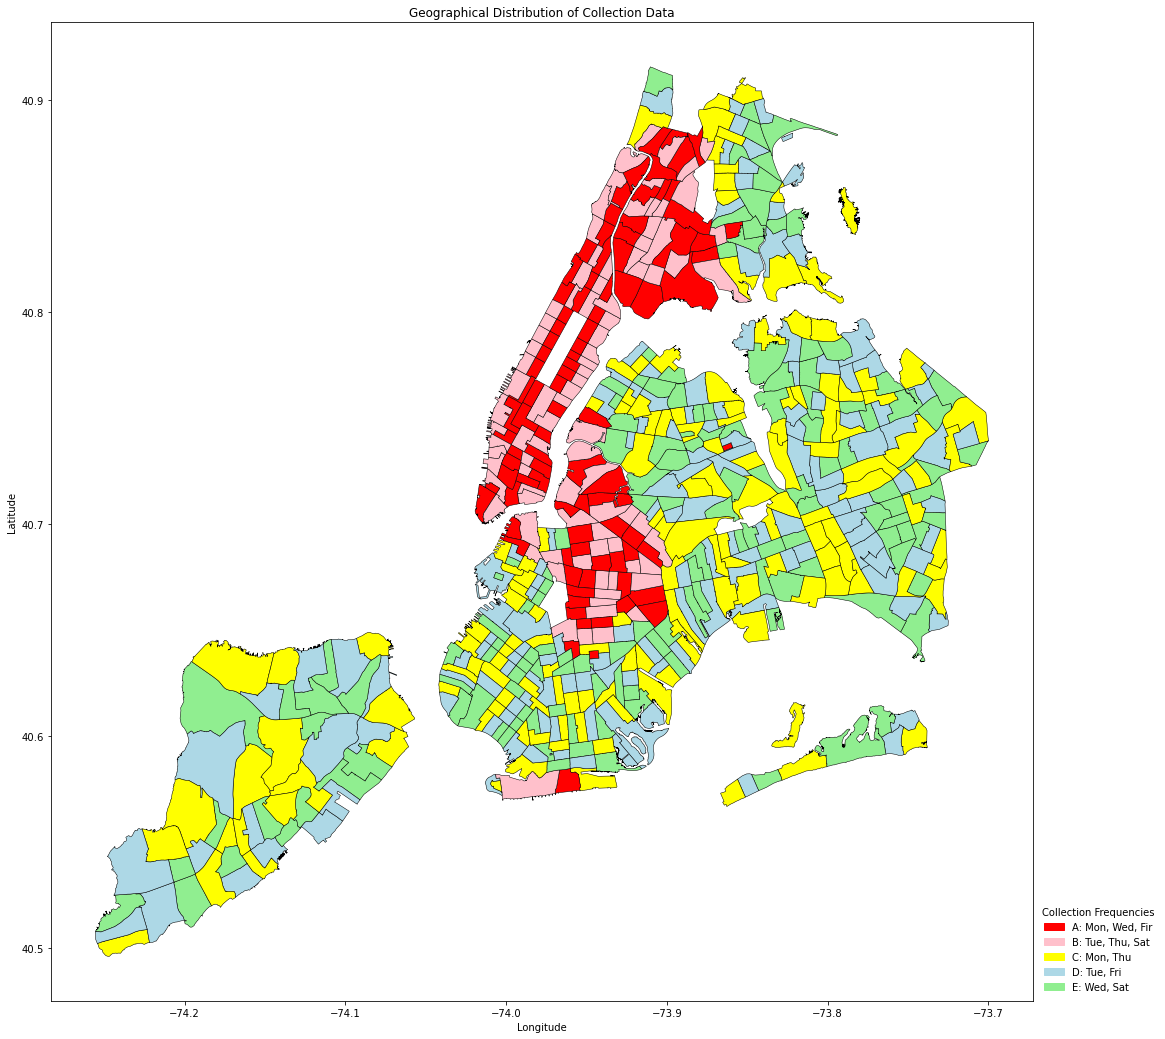

In [17]:
# Map the frequency codes to colors
frequency_colors = {
    'A': 'red',   
    'B': 'pink',  
    'C': 'yellow',    
    'D': 'lightblue', 
    'E': 'lightgreen' 
}

frequency_labels = {
    'A': 'Mon, Wed, Fir',   
    'B': 'Tue, Thu, Sat',  
    'C': 'Mon, Thu',    
    'D': 'Tue, Fri', 
    'E': 'Wed, Sat' 
}
Freq_colors = df_Freq['FREQUENCY'].map(frequency_colors)
Freq_labels = df_Freq['FREQUENCY'].map(frequency_labels)

fig, ax = plt.subplots(1, 1, figsize=(18, 18))
gdf_Freq.plot(ax=ax, color=Freq_colors,
             edgecolor='black', linewidth=0.5)
# Create a list of patches for the legend, using the frequency_labels for the descriptions
legend_patches = [Patch(color=frequency_colors[freq], label=f"{freq}: {desc}") 
                  for freq, desc in frequency_labels.items()]

# Add the legend to the plot with the custom patches
ax.legend(handles=legend_patches, title='Collection Frequencies', loc='lower left', 
          bbox_to_anchor=(1, 0), frameon=False)

ax.set_title('Geographical Distribution of Collection Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

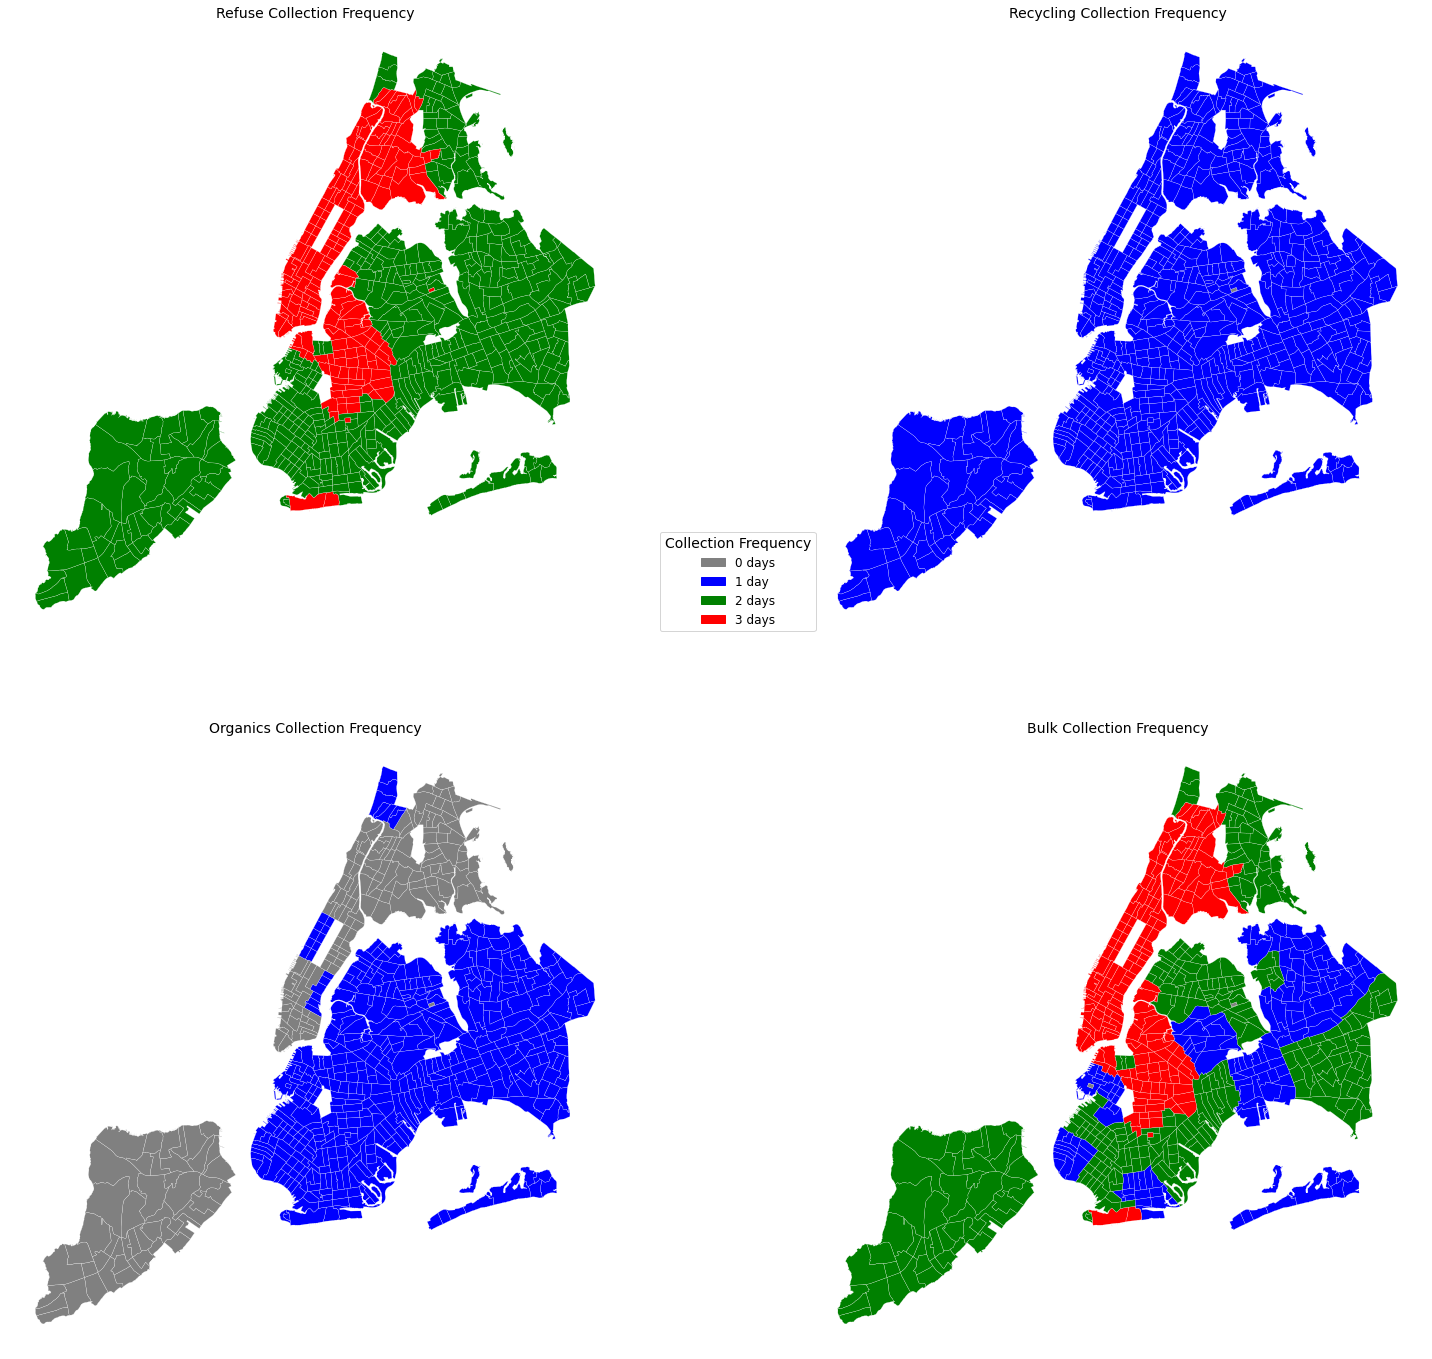

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

# Assuming 'gdf' is a GeoDataFrame that has already been created from 'df_Freq' with geometry defined

# Define a common colormap for all count columns
common_cmap = ListedColormap(['grey', 'blue', 'green', 'red'])

# Create patches for the legend
legend_patches = [
    Patch(color='grey', label='0 days'),
    Patch(color='blue', label='1 day'),
    Patch(color='green', label='2 days'),
    Patch(color='red', label='3 days')
]

# Create a figure with 4 subplots (2x2)
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Plot each map with the common colormap
maps = ['Count_FREQ_REFUSE', 'Count_FREQ_RECYCLING', 
        'Count_FREQ_ORGANICS', 'Count_FREQ_BULK']
for i, ax in enumerate(axs.flatten()):
    column = maps[i]
    data = gdf_Freq[column]
    # Normalize data to range [0, 3]
    vmin, vmax = 0, 3
    gdf_Freq.plot(column=column, ax=ax, cmap=common_cmap, vmin=vmin, vmax=vmax, legend=False,
                 edgecolor='white', linewidth=0.2)
    ax.set_title(f'{column.split("_")[2].capitalize()} Collection Frequency',
                 fontsize=14)
    ax.axis('off')

# Place the legend on the first subplot for consistency
axs[0, 0].legend(handles=legend_patches, title='Collection Frequency',
                 loc='lower left', bbox_to_anchor=(1.05, 0),
                fontsize=12, title_fontsize=14)

# Adjust layout to make room for the legend
plt.tight_layout()
plt.show()


In [19]:
district_gdf_Freq = gdf_Freq.dissolve(by='DISTRICT', as_index=False)

In [20]:
district_gdf_Freq.head()

,DISTRICT,geometry,SECTION,FREQUENCY,SCHEDULECODE,FREQ_REFUSE,FREQ_RECYCLING,FREQ_ORGANICS,FREQ_BULK,ObjectID,...,multipolygon,FREQ_RESFUSEID,Borough,Extracted_District,Extracted_Section,Count_FREQ_TOTAL,Count_FREQ_REFUSE,Count_FREQ_RECYCLING,Count_FREQ_ORGANICS,Count_FREQ_BULK
0,BKN01,"POLYGON ((-73.94197 40.70066, -73.94198 40.700...",BKN012,B,3012B,"Tue, Thu, Sat",Thu,Thu,"Tue, Thu, Sat",161,...,"MULTIPOLYGON (((-73.9543390413 40.7140717022, ...",BKN012THS,Brooklyn,01,2,3,3,1,1,3
1,BKN02,"POLYGON ((-73.95986 40.68815, -73.95971 40.687...",BKN024,C,3024C,"Mon, Thu",Thu,Thu,"Mon, Thu",174,...,"MULTIPOLYGON (((-73.9747866386 40.6980048114, ...",BKN024MH,Brooklyn,02,4,3,2,1,1,2
2,BKN03,"POLYGON ((-73.91718 40.68318, -73.91717 40.683...",BKN032,B,3032B,"Tue, Thu, Sat",Tue,Tue,"Tue, Thu, Sat",180,...,"MULTIPOLYGON (((-73.9473105666 40.6858454855, ...",BKN032THS,Brooklyn,03,2,3,3,1,1,3
3,BKN04,"POLYGON ((-73.90267 40.68052, -73.90267 40.680...",BKN041,B,3041B,"Tue, Thu, Sat",Tue,Tue,"Tue, Thu, Sat",188,...,"MULTIPOLYGON (((-73.9218918474 40.7093960964, ...",BKN041THS,Brooklyn,04,1,3,3,1,1,3
4,BKN05,"POLYGON ((-73.87655 40.64264, -73.87683 40.642...",BKN051,E,3051E,"Wed, Sat",Wed,Wed,"Wed, Sat",195,...,"MULTIPOLYGON (((-73.8847034837 40.6722342021, ...",BKN051WS,Brooklyn,05,1,3,2,1,1,2


### Litter Basket

BASKETTYPE:
- Physical type of basket. 
- C = Solar-powered Compactor, D = Parks basket, E = Seasonal Wire basket, H = High-end basket, R = PSR (Public Space Receptacle), S = Wire basket. 

OwnerType:
- "Ownership of basket. 
- D = DSNY-owned, B = BID-owned, O = Other, P = Privately owned.

In [21]:
df_lb = pd.read_csv('DSNY_Litter_Basket_Inventory_20240412.csv')
df_lb.head()

,BASKETID,BASKETTYPE,DIRECTION,LOCATION_DESCRIPTION,OWNERTYPE,SECTION,STATEPLANE_LABELX,STATEPLANE_LABELY,STATEPLANE_SNAPPEDX,STATEPLANE_SNAPPEDY,STREETNAME1,STREETNAME2,OBJECTID,point
0,20830076,S,NaN,NaN,D,BX083,1.010882e+06,262449.998772,NaN,NaN,NaN,NaN,9118,POINT (-73.9036821612 40.8869984052)
1,10930211,S,NaN,NaN,D,MN093,9.984087e+05,243063.759985,NaN,NaN,NaN,NaN,7285,POINT (-73.9488347059 40.8338178525)
2,10720061,H,SW,SW corner of COLUMBUS AV and W 80 ST,B,MN072,9.911033e+05,224397.890165,991140.107271,224403.488251,COLUMBUS AV,W 80 ST,5689,POINT (-73.9752530707 40.7825938981)
3,10630050,H,NE,NE corner of 3 AV and E 52 ST,B,MN063,9.926869e+05,215111.260444,992645.432672,215099.392358,3 AV,E 52 ST,5285,POINT (-73.9695467272 40.7571031488)
4,10110042,H,NaN,NaN,P,MN011,9.797356e+05,198413.844692,NaN,NaN,NaN,NaN,4666,POINT (-74.0162835878 40.7112757283)


In [22]:
df_lb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24681 entries, 0 to 24680
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BASKETID              24681 non-null  int64  
 1   BASKETTYPE            24681 non-null  object 
 2   DIRECTION             24418 non-null  object 
 3   LOCATION_DESCRIPTION  24605 non-null  object 
 4   OWNERTYPE             24681 non-null  object 
 5   SECTION               24681 non-null  object 
 6   STATEPLANE_LABELX     24665 non-null  float64
 7   STATEPLANE_LABELY     24665 non-null  float64
 8   STATEPLANE_SNAPPEDX   24596 non-null  float64
 9   STATEPLANE_SNAPPEDY   24596 non-null  float64
 10  STREETNAME1           24551 non-null  object 
 11  STREETNAME2           22010 non-null  object 
 12  OBJECTID              24681 non-null  int64  
 13  point                 24681 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 2.6+ MB


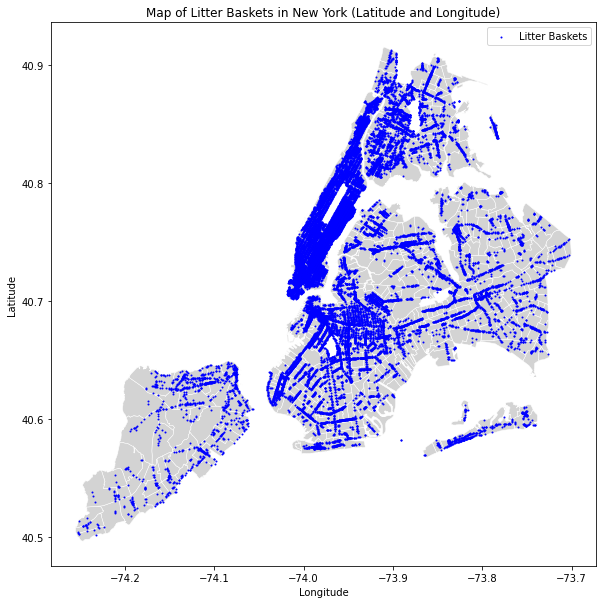

In [23]:
df_lb = pd.read_csv('DSNY_Litter_Basket_Inventory_20240412.csv')
# Convert the 'point' string to a geometric object using the WKT format
df_lb['geometry'] = df_lb['point'].apply(wkt.loads)

# Create a GeoDataFrame using the geometry column with WGS 84 CRS (EPSG:4326)
gdf_lb = gpd.GeoDataFrame(df_lb, crs="EPSG:4326", geometry='geometry')

# Plotting the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
gdf_Freq.plot(ax=ax, color='lightgrey',
             edgecolor='white', linewidth=0.5)
gdf_lb.plot(ax=ax, markersize=1, color='blue', label='Litter Baskets')

# Setting the title and labels
plt.title('Map of Litter Baskets in New York (Latitude and Longitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [24]:
df_lb['BASKETTYPE'].value_counts(normalize=True,ascending=False)*100

BASKETTYPE
S    47.222560
R    23.451238
H    19.760139
D     5.903326
C     3.573599
E     0.089137
Name: proportion, dtype: float64

In [25]:
df_lb['OWNERTYPE'].value_counts(normalize=True,ascending=False)*100

OWNERTYPE
D    74.206880
B    14.509137
O     9.493132
P     1.790851
Name: proportion, dtype: float64

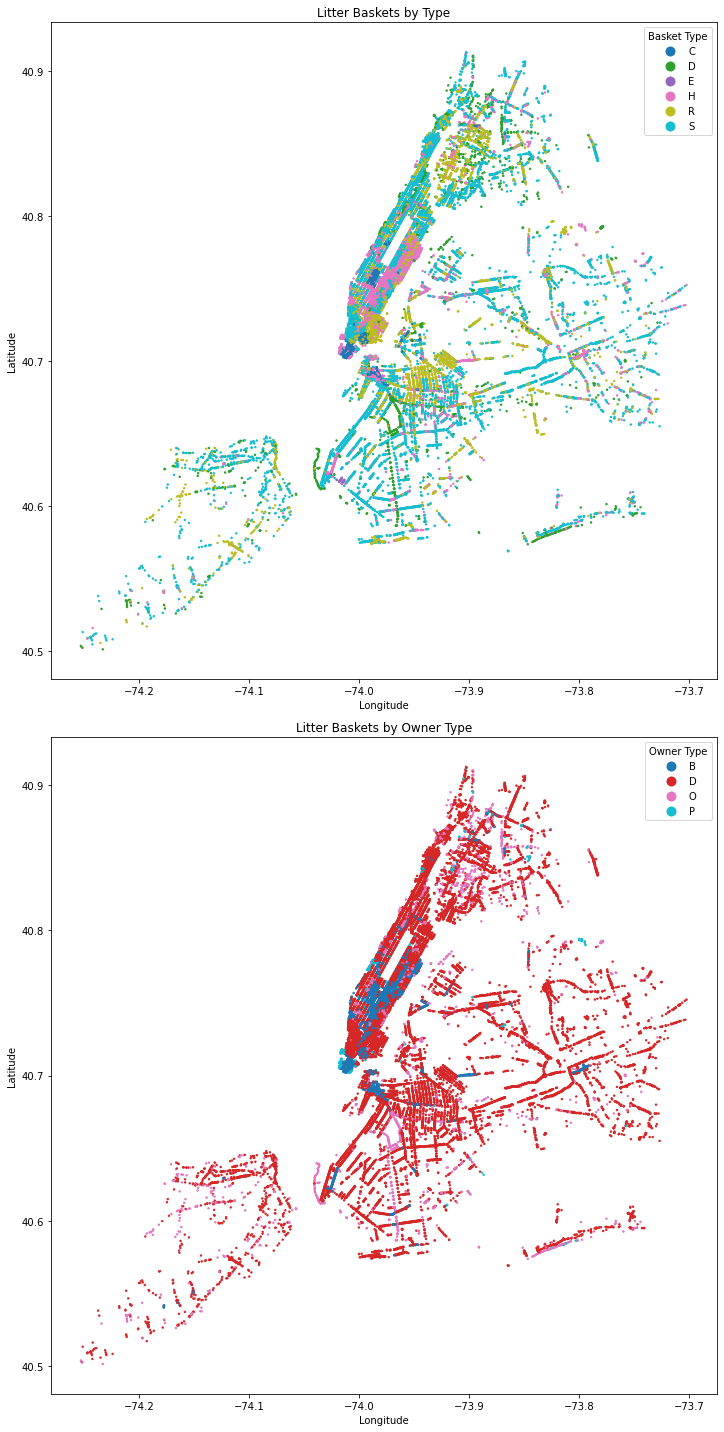

In [26]:
# Create the plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 20))

# First map: color by BASKETTYPE
gdf_lb.plot(ax=ax1, column='BASKETTYPE', legend=True,
                        legend_kwds={'title': 'Basket Type'},markersize=2)
ax1.set_title('Litter Baskets by Type')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Second map: color by OWNERTYPE
gdf_lb.plot(ax=ax2, column='OWNERTYPE', legend=True,
                        legend_kwds={'title': 'Owner Type'},markersize=2)
ax2.set_title('Litter Baskets by Owner Type')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

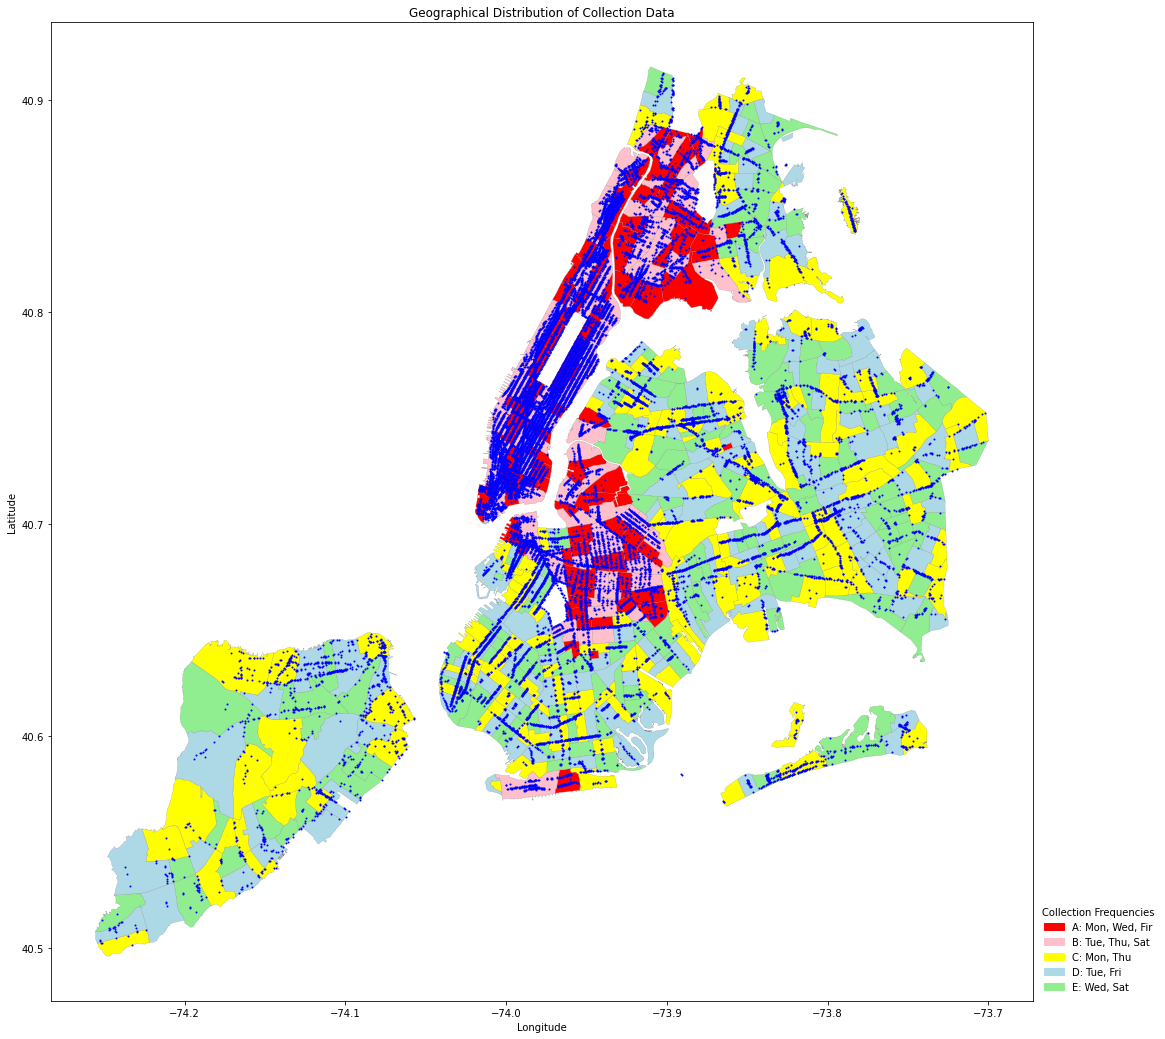

In [27]:
# Over lapping 
fig, ax = plt.subplots(1, 1, figsize=(18, 18))

gdf_Freq.plot(ax=ax, color=Freq_colors,
             edgecolor='grey', linewidth=0.2)

gdf_lb.plot(ax=ax, markersize=1, color='blue', label='Litter Baskets')

# Create a list of patches for the legend, using the frequency_labels for the descriptions
legend_patches = [Patch(color=frequency_colors[freq], label=f"{freq}: {desc}") 
                  for freq, desc in frequency_labels.items()]
# Add the legend to the plot with the custom patches
ax.legend(handles=legend_patches, title='Collection Frequencies', loc='lower left', 
          bbox_to_anchor=(1, 0), frameon=False)
ax.set_title('Geographical Distribution of Collection Data')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [28]:
# Perform the spatial join, replace 'op' with 'predicate' due to deprecation warning
joined_gdf = gpd.sjoin(gdf_lb, gdf_Freq, how='inner', predicate='within')

# Count the number of points in each polygon
point_count = joined_gdf.groupby('index_right').size()

# Convert the Series to a DataFrame
point_count_df = point_count.reset_index(name='point_count')

# Merge the point count back into the original polygon GeoDataFrame
# The merge should be on the index of gdf_Freq, which should align with 'index_right' from the spatial join
# Since the index of gdf_Freq is unnamed, we should merge on the index without specifying a name
gdf_Freq_with_count_section = gdf_Freq.merge(point_count_df, how='left', left_index=True, right_on='index_right')

# Now, if you print gdf_Freq_with_count, it will have a new column 'point_count' with the number of points in each polygon
gdf_Freq_with_count_section[['geometry', 'point_count']].head()

,geometry,point_count
0.0,"MULTIPOLYGON (((-73.84289 40.57420, -73.84340 ...",70.0
1.0,"MULTIPOLYGON (((-73.88470 40.67223, -73.88476 ...",25.0
2.0,"MULTIPOLYGON (((-73.79237 40.75302, -73.79229 ...",9.0
3.0,"MULTIPOLYGON (((-73.99826 40.63601, -73.99839 ...",27.0
4.0,"MULTIPOLYGON (((-73.85425 40.85383, -73.85422 ...",39.0


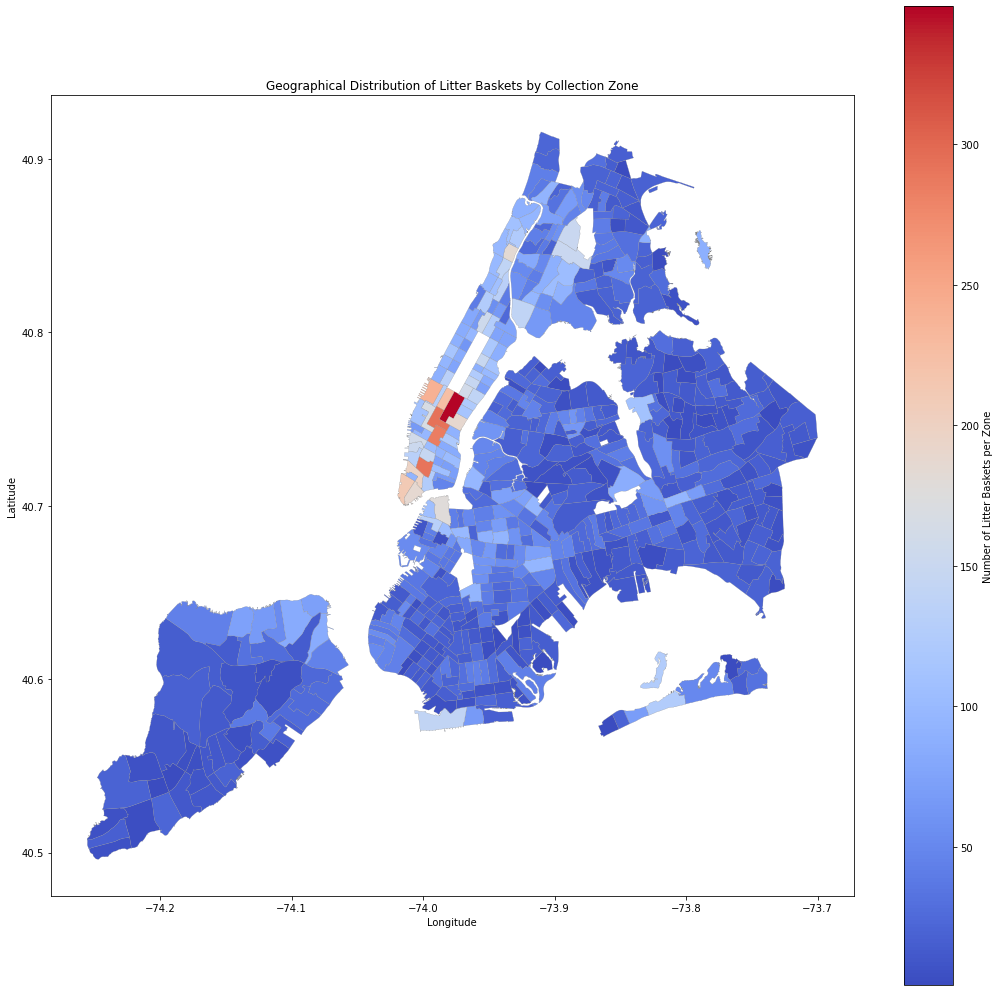

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(18, 18))

# Plot the polygons and use the 'point_count' column to determine the color
gdf_Freq_with_count_section.plot(ax=ax, column='point_count', cmap='coolwarm', legend=True,
                         legend_kwds={'label': "Number of Litter Baskets per Zone"},
                        edgecolor='grey', linewidth=0.2)

# Add other plot customizations here
ax.set_title('Geographical Distribution of Litter Baskets by Collection Zone')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


In [30]:
# Perform the spatial join, replace 'op' with 'predicate' due to deprecation warning
joined_gdf = gpd.sjoin(gdf_lb, district_gdf_Freq, how='inner', predicate='within')

# Count the number of points in each polygon
point_count = joined_gdf.groupby('index_right').size()

# Convert the Series to a DataFrame
point_count_df = point_count.reset_index(name='point_count')

# Merge the point count back into the original polygon GeoDataFrame
# The merge should be on the index of gdf_Freq, which should align with 'index_right' from the spatial join
# Since the index of gdf_Freq is unnamed, we should merge on the index without specifying a name
gdf_Freq_with_count = district_gdf_Freq.merge(point_count_df, how='left', left_index=True, right_on='index_right')

# Now, if you print gdf_Freq_with_count, it will have a new column 'point_count' with the number of points in each polygon
gdf_Freq_with_count[['geometry', 'point_count']].head()


,geometry,point_count
0,"POLYGON ((-73.94197 40.70066, -73.94198 40.700...",438
1,"POLYGON ((-73.95986 40.68815, -73.95971 40.687...",769
2,"POLYGON ((-73.91718 40.68318, -73.91717 40.683...",570
3,"POLYGON ((-73.90267 40.68052, -73.90267 40.680...",320
4,"POLYGON ((-73.87655 40.64264, -73.87683 40.642...",308


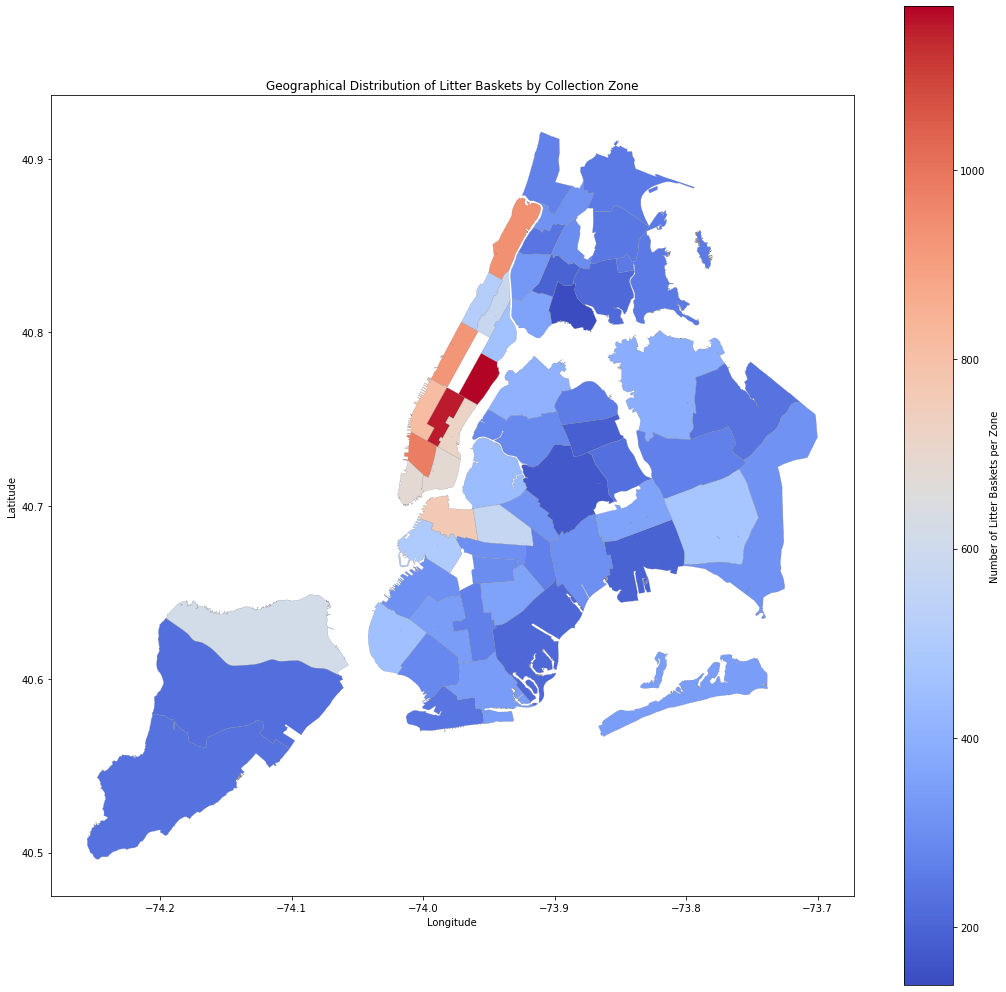

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(18, 18))

# Plot the polygons and use the 'point_count' column to determine the color
gdf_Freq_with_count.plot(ax=ax, column='point_count', cmap='coolwarm', legend=True,
                         legend_kwds={'label': "Number of Litter Baskets per Zone"},
                        edgecolor='grey', linewidth=0.2)

# Add other plot customizations here
ax.set_title('Geographical Distribution of Litter Baskets by Collection Zone')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


### DSNY_Monthly_Tonnage

REFUSETONSCOLLECTED:
- Tons of trash or refuse collected from NYC residences and institutions serviced by the NYC Department of Sanitation.

PAPERTONSCOLLECTED:
- Tons of source-separated recyclable paper collected from NYC residences and institutions serviced by the NYC Department of Sanitation.

MGPTONSCOLLECTED:
- Tons of source-separated recyclable metal, glass, plastic, and beverage cartons collected from NYC residences and institutions serviced by the NYC Department of Sanitation.!

BOROUGH_ID:
- 1 = Manhattan; 2 = Bronx; 3 = Brooklyn; 4 = Queens; 5 = Staten Island

In [48]:
df_mt=pd.read_csv('DSNY_Monthly_Tonnage_Data_20240412.csv')

In [49]:
mask = df_mt['MONTH'].str.startswith('2023')
df_mt = df_mt[mask]
df_mt.head()

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
2834,2023 / 01,Brooklyn,09,2885.1,284.7,232.6,NaN,NaN,NaN,12.9,3.0
2835,2023 / 01,Brooklyn,05,4385.2,256.9,435.0,NaN,NaN,NaN,5.3,3.0
2836,2023 / 01,Bronx,11,2851.8,274.9,340.5,NaN,NaN,NaN,12.9,2.0
2837,2023 / 01,Bronx,10,2444.5,292.8,338.3,NaN,36.7,NaN,19.6,2.0
2838,2023 / 01,Manhattan,10,2554.2,248.7,231.3,NaN,NaN,NaN,14.4,1.0


In [50]:
df_mt.isnull().sum()

MONTH                    0
BOROUGH                  0
COMMUNITYDISTRICT        0
REFUSETONSCOLLECTED      0
PAPERTONSCOLLECTED       0
MGPTONSCOLLECTED         0
RESORGANICSTONS        442
SCHOOLORGANICTONS      435
LEAVESORGANICTONS      689
XMASTREETONS           649
BOROUGH_ID               0
dtype: int64

In [51]:
columns_to_drop = ['RESORGANICSTONS', 'SCHOOLORGANICTONS', 'LEAVESORGANICTONS', 'XMASTREETONS']
df_mt = df_mt.drop(columns=columns_to_drop)

In [52]:
df_mt['TOTALTONSCOLLECTED'] = df_mt['REFUSETONSCOLLECTED'] + df_mt['PAPERTONSCOLLECTED'] + df_mt['MGPTONSCOLLECTED']

In [53]:
df_mt_bd = df_mt.groupby(by = ['BOROUGH','COMMUNITYDISTRICT'], as_index = False).sum()

In [54]:
df_mt_bd = df_mt_bd.drop(columns = 'MONTH')

In [55]:
df_mt_bd.head()

,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,BOROUGH_ID,TOTALTONSCOLLECTED
0,Bronx,01,26229.8,1506.6,1651.4,24.0,29387.8
1,Bronx,02,18027.2,1188.1,1637.9,24.0,20853.2
2,Bronx,03,24901.8,1586.2,1863.7,24.0,28351.7
3,Bronx,04,45923.1,2892.4,3798.8,24.0,52614.3
4,Bronx,05,38932.2,2419.5,3830.1,24.0,45181.8


In [56]:
district_gdf_Freq.head()

,DISTRICT,geometry,SECTION,FREQUENCY,SCHEDULECODE,FREQ_REFUSE,FREQ_RECYCLING,FREQ_ORGANICS,FREQ_BULK,ObjectID,...,multipolygon,FREQ_RESFUSEID,Borough,Extracted_District,Extracted_Section,Count_FREQ_TOTAL,Count_FREQ_REFUSE,Count_FREQ_RECYCLING,Count_FREQ_ORGANICS,Count_FREQ_BULK
0,BKN01,"POLYGON ((-73.94197 40.70066, -73.94198 40.700...",BKN012,B,3012B,"Tue, Thu, Sat",Thu,Thu,"Tue, Thu, Sat",161,...,"MULTIPOLYGON (((-73.9543390413 40.7140717022, ...",BKN012THS,Brooklyn,01,2,3,3,1,1,3
1,BKN02,"POLYGON ((-73.95986 40.68815, -73.95971 40.687...",BKN024,C,3024C,"Mon, Thu",Thu,Thu,"Mon, Thu",174,...,"MULTIPOLYGON (((-73.9747866386 40.6980048114, ...",BKN024MH,Brooklyn,02,4,3,2,1,1,2
2,BKN03,"POLYGON ((-73.91718 40.68318, -73.91717 40.683...",BKN032,B,3032B,"Tue, Thu, Sat",Tue,Tue,"Tue, Thu, Sat",180,...,"MULTIPOLYGON (((-73.9473105666 40.6858454855, ...",BKN032THS,Brooklyn,03,2,3,3,1,1,3
3,BKN04,"POLYGON ((-73.90267 40.68052, -73.90267 40.680...",BKN041,B,3041B,"Tue, Thu, Sat",Tue,Tue,"Tue, Thu, Sat",188,...,"MULTIPOLYGON (((-73.9218918474 40.7093960964, ...",BKN041THS,Brooklyn,04,1,3,3,1,1,3
4,BKN05,"POLYGON ((-73.87655 40.64264, -73.87683 40.642...",BKN051,E,3051E,"Wed, Sat",Wed,Wed,"Wed, Sat",195,...,"MULTIPOLYGON (((-73.8847034837 40.6722342021, ...",BKN051WS,Brooklyn,05,1,3,2,1,1,2


In [57]:
district_gdf_Freq_mt = district_gdf_Freq.merge(df_mt_bd, how='left', 
                                               left_on = ['Borough', 'Extracted_District'], 
                                               right_on=['BOROUGH', 'COMMUNITYDISTRICT'])

In [58]:
district_gdf_Freq_mt.columns

Index(['DISTRICT', 'geometry', 'SECTION', 'FREQUENCY', 'SCHEDULECODE',
       'FREQ_REFUSE', 'FREQ_RECYCLING', 'FREQ_ORGANICS', 'FREQ_BULK',
       'ObjectID', 'SHAPE_Area', 'SHAPE_Length', 'multipolygon',
       'FREQ_RESFUSEID', 'Borough', 'Extracted_District', 'Extracted_Section',
       'Count_FREQ_TOTAL', 'Count_FREQ_REFUSE', 'Count_FREQ_RECYCLING',
       'Count_FREQ_ORGANICS', 'Count_FREQ_BULK', 'BOROUGH',
       'COMMUNITYDISTRICT', 'REFUSETONSCOLLECTED', 'PAPERTONSCOLLECTED',
       'MGPTONSCOLLECTED', 'BOROUGH_ID', 'TOTALTONSCOLLECTED'],
      dtype='object')

In [59]:
district_gdf_Freq_mt.geometry.head()

0    POLYGON ((-73.94197 40.70066, -73.94198 40.700...
1    POLYGON ((-73.95986 40.68815, -73.95971 40.687...
2    POLYGON ((-73.91718 40.68318, -73.91717 40.683...
3    POLYGON ((-73.90267 40.68052, -73.90267 40.680...
4    POLYGON ((-73.87655 40.64264, -73.87683 40.642...
Name: geometry, dtype: geometry

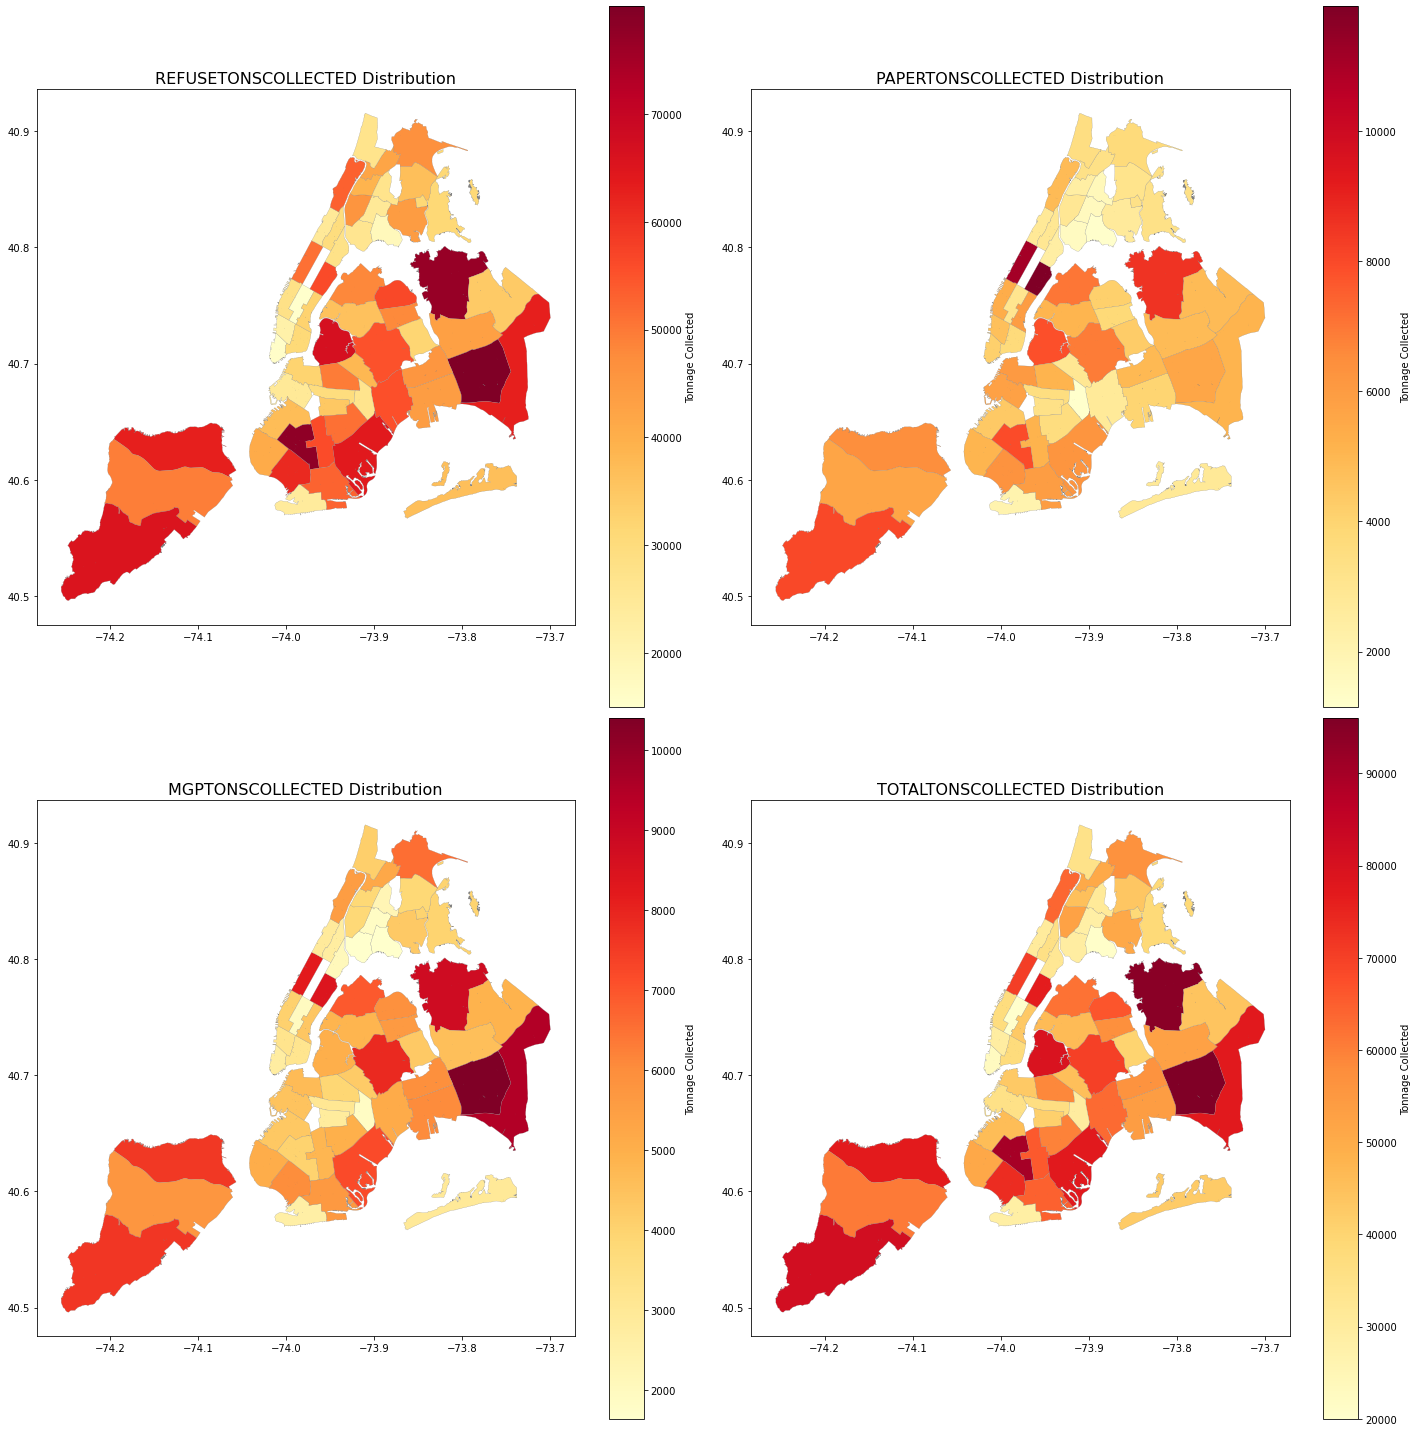

In [60]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Create a figure with 4 subplots (2x2)
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Plot each map with the common colormap
maps = ['REFUSETONSCOLLECTED', 'PAPERTONSCOLLECTED', 
        'MGPTONSCOLLECTED', 'TOTALTONSCOLLECTED']

for i, ax in enumerate(axs.flatten()):
    column = maps[i]
    # Plotting the data
    district_gdf_Freq_mt.plot(ax=ax, column=column, cmap='YlOrRd', legend=True,
                              legend_kwds={'label': "Tonnage Collected"},
                              edgecolor='grey', linewidth=0.2)
    # Set the title using the name of the column
    ax.set_title(f'{column} Distribution', fontsize=16)
    ax.axis('on')  # or 'equal' if you want to maintain aspect ratio

# Adjust layout to make room for the legend
plt.tight_layout()
plt.show()


In [61]:
district_gdf_geoinfo = gdf_Freq_with_count[['Borough', 'Extracted_District','geometry','point_count']]

In [62]:
df_mt_geo = df_mt.merge(district_gdf_geoinfo, 
                    left_on=['BOROUGH', 'COMMUNITYDISTRICT'], 
                    right_on=['Borough', 'Extracted_District'], how='left')

In [80]:
df_mt_bd_geo = df_mt_bd.merge(district_gdf_geoinfo, 
                    left_on=['BOROUGH', 'COMMUNITYDISTRICT'], 
                    right_on=['Borough', 'Extracted_District'], how='left')

In [81]:
df_mt_bd_geo.head()

,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,BOROUGH_ID,TOTALTONSCOLLECTED,Borough,Extracted_District,geometry,point_count
0,Bronx,01,26229.8,1506.6,1651.4,24.0,29387.8,Bronx,01,"POLYGON ((-73.90252 40.80446, -73.90276 40.804...",358
1,Bronx,02,18027.2,1188.1,1637.9,24.0,20853.2,Bronx,02,"POLYGON ((-73.88391 40.82798, -73.88427 40.827...",139
2,Bronx,03,24901.8,1586.2,1863.7,24.0,28351.7,Bronx,03,"POLYGON ((-73.88864 40.83908, -73.88869 40.839...",193
3,Bronx,04,45923.1,2892.4,3798.8,24.0,52614.3,Bronx,04,"POLYGON ((-73.91363 40.82692, -73.91388 40.826...",326
4,Bronx,05,38932.2,2419.5,3830.1,24.0,45181.8,Bronx,05,"POLYGON ((-73.89839 40.85187, -73.89842 40.851...",239


In [86]:
df_mt_bd_geo.shape

(59, 11)

In [84]:
DSNY_Tonnage_geo = df_mt_bd_geo.drop(columns = ['BOROUGH_ID','Borough','Extracted_District'])

In [89]:
# DSNY_Monthly_Tonnage with geo data and the number of Baskets in each district
DSNY_Tonnage_geo.to_csv('DSNY_Tonnage_geo_byDis.csv', index=False)

In [90]:
DSNY_Tonnage_geo.shape

(59, 8)

#### Dataset merge

In [91]:
df_DSNY = gdf_Freq_with_count_section[['Borough','Extracted_District','SECTION','Count_FREQ_TOTAL','geometry','point_count']]

In [92]:
df_DSNY.head()

,Borough,Extracted_District,SECTION,Count_FREQ_TOTAL,geometry,point_count
0.0,Queens,14,QE141,2,"MULTIPOLYGON (((-73.84289 40.57420, -73.84340 ...",70.0
1.0,Brooklyn,05,BKN051,3,"MULTIPOLYGON (((-73.88470 40.67223, -73.88476 ...",25.0
2.0,Queens,11,QE113,2,"MULTIPOLYGON (((-73.79237 40.75302, -73.79229 ...",9.0
3.0,Brooklyn,12,BKS121,3,"MULTIPOLYGON (((-73.99826 40.63601, -73.99839 ...",27.0
4.0,Bronx,11,BX111,3,"MULTIPOLYGON (((-73.85425 40.85383, -73.85422 ...",39.0


In [93]:
df_DSNY.shape

(610, 6)

In [94]:
# DSNY_Monthly_Tonnage with geo data and the number of Baskets in each district
df_DSNY.to_csv('DSNY_Collection_Frequency_geo_bySec.csv', index=False)

In [95]:
df_mt_bd.head()

,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,BOROUGH_ID,TOTALTONSCOLLECTED
0,Bronx,01,26229.8,1506.6,1651.4,24.0,29387.8
1,Bronx,02,18027.2,1188.1,1637.9,24.0,20853.2
2,Bronx,03,24901.8,1586.2,1863.7,24.0,28351.7
3,Bronx,04,45923.1,2892.4,3798.8,24.0,52614.3
4,Bronx,05,38932.2,2419.5,3830.1,24.0,45181.8


In [96]:
df_mt_bd.shape

(59, 7)

In [97]:
df_DSNY = df_DSNY.merge(df_mt_bd,
                        right_on=['BOROUGH', 'COMMUNITYDISTRICT'], 
                        left_on=['Borough', 'Extracted_District'], how='left')

In [98]:
df_DSNY.shape

(610, 13)

In [99]:
df_DSNY = df_DSNY.drop(columns = ['Borough','Extracted_District'])

In [100]:
df_DSNY.head()

,SECTION,Count_FREQ_TOTAL,geometry,point_count,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,BOROUGH_ID,TOTALTONSCOLLECTED
0,QE141,2,"MULTIPOLYGON (((-73.84289 40.57420, -73.84340 ...",70.0,Queens,14,36778.3,2794.6,2948.3,48.0,42521.2
1,BKN051,3,"MULTIPOLYGON (((-73.88470 40.67223, -73.88476 ...",25.0,Brooklyn,05,55366.3,2719.9,5140.7,36.0,63226.9
2,QE113,2,"MULTIPOLYGON (((-73.79237 40.75302, -73.79229 ...",9.0,Queens,11,34483.5,4874.8,4910.5,48.0,44268.8
3,BKS121,3,"MULTIPOLYGON (((-73.99826 40.63601, -73.99839 ...",27.0,Brooklyn,12,77849.0,7949.2,4012.9,36.0,89811.1
4,BX111,3,"MULTIPOLYGON (((-73.85425 40.85383, -73.85422 ...",39.0,Bronx,11,36606.7,3158.2,3855.4,24.0,43620.3


In [101]:
df_DSNY.to_csv('DSNY_Data.csv', index=False)